In [2]:
import pandas as pd

print("Pandas imported successfully!")


Pandas imported successfully!


In [6]:
import os 

In [8]:
os.listdir()


['grocery_chain_data.csv',
 'phase2.ipynb',
 'rf-phase2-dataanalyst-noorunnisha-main.zip']

In [10]:
import pandas as pd 
df=pd.read_csv("grocery_chain_data.csv")
df.head()


,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
0,2824,GreenGrocer Plaza,2023-08-26,Produce,Pasta,2.0,7.46,14.92,0.00,14.92,377
1,5506,ValuePlus Market,2024-02-13,Dairy,Cheese,1.0,1.85,1.85,3.41,-1.56,111
2,4657,ValuePlus Market,2023-11-23,Bakery,Onions,4.0,7.38,29.52,4.04,25.48,301
3,2679,SuperSave Central,2025-01-13,Snacks & Candy,Cereal,3.0,5.50,16.50,1.37,15.13,490
4,9935,GreenGrocer Plaza,2023-10-13,Canned Goods,Orange Juice,5.0,8.66,43.30,1.50,41.80,22


In [11]:
df.info()
df.shape
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1980 non-null   int64  
 1   store_name        1955 non-null   object 
 2   transaction_date  1980 non-null   object 
 3   aisle             1980 non-null   object 
 4   product_name      1980 non-null   object 
 5   quantity          1980 non-null   float64
 6   unit_price        1980 non-null   float64
 7   total_amount      1980 non-null   float64
 8   discount_amount   1980 non-null   float64
 9   final_amount      1980 non-null   float64
 10  loyalty_points    1980 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 170.3+ KB


np.int64(0)

In [12]:
df['transaction_date']=pd.to_datetime(df['transaction_date'])
df['store_name']=df['store_name'].fillna("Unknown Store")
df.isnull().sum()


customer_id         0
store_name          0
transaction_date    0
aisle               0
product_name        0
quantity            0
unit_price          0
total_amount        0
discount_amount     0
final_amount        0
loyalty_points      0
dtype: int64

In [3]:
import pandas as pd
df=pd.read_csv("grocery_chain_data.csv")
store_revenue = df.groupby("store_name")["final_amount"].sum().sort_values(ascending=False)
store_revenue.head()


store_name
GreenGrocer Plaza    9880.76
SuperSave Central    9859.89
City Fresh Store     9788.70
MegaMart Westside    9295.79
Corner Grocery       9285.50
Name: final_amount, dtype: float64


The GreenGrocer Plaza contributes the most to overall business performance. 

In [5]:
aisle_sales=df.groupby("aisle")["final_amount"].sum().sort_values(ascending=False)
aisle_sales.head()


aisle
Personal Care        8289.12
Snacks & Candy       8066.95
Canned Goods         8046.58
Health & Wellness    7905.44
Beverages            7820.25
Name: final_amount, dtype: float64

### Insight:
Top-performing aisles represent high customer demand categories and should be prioritized for inventory and promotions.


In [9]:
product_sales=df.groupby("product_name")["final_amount"].sum().sort_values(ascending=False).head(10)
product_sales

product_name
Tomatoes          5381.71
Bread             5349.36
Potatoes          5306.25
Chicken Breast    5172.88
Eggs              4825.59
Bananas           4710.76
Cereal            4691.40
Pasta             4625.74
Onions            4611.75
Orange Juice      4601.14
Name: final_amount, dtype: float64

### Insight:
These products generate the highest revenue and should be kept in stock and promoted to maximize profit.


In [11]:
df["transaction_date"]=pd.to_datetime(df["transaction_date"])

In [12]:
df["month"] = df["transaction_date"].dt.to_period("M")

monthly_sales = df.groupby("month")["final_amount"].sum()
monthly_sales


month
2023-08    2897.64
2023-09    3144.36
2023-10    3768.18
2023-11    3589.96
2023-12    2892.35
2024-01    2715.54
2024-02    3486.86
2024-03    3644.50
2024-04    2945.29
2024-05    3954.72
2024-06    3063.13
2024-07    3684.66
2024-08    3373.27
2024-09    3182.18
2024-10    4098.31
2024-11    3816.09
2024-12    3254.52
2025-01    3694.00
2025-02    2975.47
2025-03    4560.01
2025-04    3835.22
2025-05    3170.92
2025-06    2900.05
2025-07    3036.56
2025-08     353.52
Freq: M, Name: final_amount, dtype: float64

In [13]:
discount_effect = df[["discount_amount", "final_amount"]].corr()
discount_effect


,discount_amount,final_amount
discount_amount,1.000000,0.430834
final_amount,0.430834,1.000000


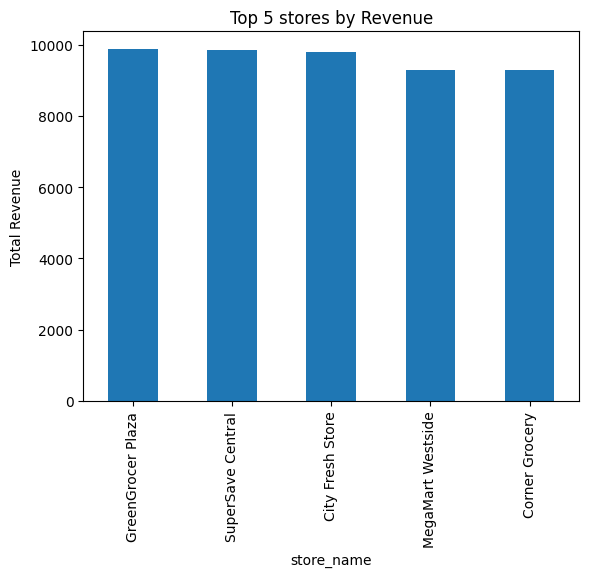

In [14]:
import matplotlib.pyplot as plt
store_revenue.head(5).plot(kind="bar",title="Top 5 stores by Revenue")
plt.ylabel("Total Revenue")
plt.show()

In [1]:
import pandas as pd 
df=pd.read_csv("grocery_chain_data.csv")
df.head()


,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
0,2824,GreenGrocer Plaza,2023-08-26,Produce,Pasta,2.0,7.46,14.92,0.00,14.92,377
1,5506,ValuePlus Market,2024-02-13,Dairy,Cheese,1.0,1.85,1.85,3.41,-1.56,111
2,4657,ValuePlus Market,2023-11-23,Bakery,Onions,4.0,7.38,29.52,4.04,25.48,301
3,2679,SuperSave Central,2025-01-13,Snacks & Candy,Cereal,3.0,5.50,16.50,1.37,15.13,490
4,9935,GreenGrocer Plaza,2023-10-13,Canned Goods,Orange Juice,5.0,8.66,43.30,1.50,41.80,22


In [10]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("grocery.db")
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)


,name
0,transaction


In [13]:
df.to_sql("transactions",conn,if_exists="replace",index=False)
conn.commit()

In [14]:
pd.read_sql("select * from transactions limit 5",conn)

,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
0,2824,GreenGrocer Plaza,2023-08-26,Produce,Pasta,2.0,7.46,14.92,0.00,14.92,377
1,5506,ValuePlus Market,2024-02-13,Dairy,Cheese,1.0,1.85,1.85,3.41,-1.56,111
2,4657,ValuePlus Market,2023-11-23,Bakery,Onions,4.0,7.38,29.52,4.04,25.48,301
3,2679,SuperSave Central,2025-01-13,Snacks & Candy,Cereal,3.0,5.50,16.50,1.37,15.13,490
4,9935,GreenGrocer Plaza,2023-10-13,Canned Goods,Orange Juice,5.0,8.66,43.30,1.50,41.80,22


In [15]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)


,name
0,transaction
1,transactions


Checking tables in database

In [16]:
pd.read_sql("select * from 'transaction' limit 5",conn)

,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
0,2824,GreenGrocer Plaza,2023-08-26,Produce,Pasta,2.0,7.46,14.92,0.00,14.92,377
1,5506,ValuePlus Market,2024-02-13,Dairy,Cheese,1.0,1.85,1.85,3.41,-1.56,111
2,4657,ValuePlus Market,2023-11-23,Bakery,Onions,4.0,7.38,29.52,4.04,25.48,301
3,2679,SuperSave Central,2025-01-13,Snacks & Candy,Cereal,3.0,5.50,16.50,1.37,15.13,490
4,9935,GreenGrocer Plaza,2023-10-13,Canned Goods,Orange Juice,5.0,8.66,43.30,1.50,41.80,22


viewing sample data

In [17]:
pd.read_sql("""select sum(final_amount) as total_sales from 'transaction'""",conn)

,total_sales
0,82037.31


total sales

In [18]:
pd.read_sql("""select store_name, sum(final_amount) as store_sales from 'transaction' group by store_name order by store_sales desc """,conn)

,store_name,store_sales
0,GreenGrocer Plaza,9880.76
1,SuperSave Central,9859.89
2,City Fresh Store,9788.70
3,MegaMart Westside,9295.79
4,Corner Grocery,9285.50
5,ValuePlus Market,8661.24
6,FreshMart Downtown,8206.87
7,QuickStop Market,8182.89
8,FamilyFood Express,7719.49
9,None,1156.18


sales by store

In [19]:
pd.read_sql(""" select product_name,sum(quantity) 
as total_quantity from 'transaction' group by 
product_name order by total_quantity desc limit 10""",
conn)

,product_name,total_quantity
0,Chicken Breast,379.0
1,Tomatoes,366.0
2,Bread,359.0
3,Potatoes,353.0
4,Onions,342.0
5,Yogurt,341.0
6,Salmon,336.0
7,Cereal,336.0
8,Eggs,333.0
9,Orange Juice,331.0


top 10 products

In [ ]:
pd.read_sql(""" select substr(transaction_date,1,7) as 
month, sum(final_amount) as monthly_sales from 
'transaction' group by month order by month limit 5"""
,conn)

,month,monthly_sales
0,2023-08,2897.64
1,2023-09,3144.36
2,2023-10,3768.18
3,2023-11,3589.96
4,2023-12,2892.35


monthly sales

In [23]:
pd.read_sql(""" select store_name,sum(loyalty_points) as total_points from 'transaction' group by store_name order by total_points desc""",conn)

,store_name,total_points
0,City Fresh Store,59446
1,SuperSave Central,57779
2,GreenGrocer Plaza,57092
3,FamilyFood Express,56941
4,MegaMart Westside,56316
5,QuickStop Market,55770
6,Corner Grocery,54260
7,ValuePlus Market,50752
8,FreshMart Downtown,50432
9,None,6405


loyalty points by store